In [1]:
# import sys

# !"{sys.executable}" -m pip install -U pandas-profiling[notebook]
# !jupyter nbextension enable --py widgetsnbextension

`we will be using pandas ProfileReport function in this notebook`

In [2]:
from markupsafe import escape # required as jinja has removed some function , we would get error while importing ProfileReport

In [3]:
import pandas as pd
from pandas_profiling import ProfileReport
import numpy as np
import matplotlib.pyplot as plt


from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

import tensorflow as tf
from tensorflow.keras import Input 
from tensorflow.keras.layers import Dense 
from tensorflow.keras import Model

In [4]:
data = pd.read_csv('../input/iris/Iris.csv')

In [5]:
data

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...,...
145,146,6.7,3.0,5.2,2.3,Iris-virginica
146,147,6.3,2.5,5.0,1.9,Iris-virginica
147,148,6.5,3.0,5.2,2.0,Iris-virginica
148,149,6.2,3.4,5.4,2.3,Iris-virginica


In [6]:
data.drop('Id',axis = 1 , inplace = True)

In [7]:
data.head(5)

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [8]:
profile = ProfileReport(data)
profile.to_notebook_iframe()

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

In [9]:
y = data['Species']
X = data.drop('Species' ,axis = 1)

In [10]:
y

0         Iris-setosa
1         Iris-setosa
2         Iris-setosa
3         Iris-setosa
4         Iris-setosa
            ...      
145    Iris-virginica
146    Iris-virginica
147    Iris-virginica
148    Iris-virginica
149    Iris-virginica
Name: Species, Length: 150, dtype: object

In [11]:
X

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


In [12]:
encoder = LabelEncoder()
y = encoder.fit_transform(y)
species_mapping = {index : label for index , label in enumerate(encoder.classes_)}
species_mapping

{0: 'Iris-setosa', 1: 'Iris-versicolor', 2: 'Iris-virginica'}

In [13]:
y

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [14]:
X

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


In [15]:
scaler = StandardScaler()
X = scaler.fit_transform(X)


In [16]:
# transform function turn dataframe to numpy array
pd.DataFrame(X)

,0,1,2,3
0,-0.900681,1.032057,-1.341272,-1.312977
1,-1.143017,-0.124958,-1.341272,-1.312977
2,-1.385353,0.337848,-1.398138,-1.312977
3,-1.506521,0.106445,-1.284407,-1.312977
4,-1.021849,1.263460,-1.341272,-1.312977
...,...,...,...,...
145,1.038005,-0.124958,0.819624,1.447956
146,0.553333,-1.281972,0.705893,0.922064
147,0.795669,-0.124958,0.819624,1.053537
148,0.432165,0.800654,0.933356,1.447956


In [17]:
pd.DataFrame(X).describe()

,0,1,2,3
count,1.500000e+02,1.500000e+02,1.500000e+02,1.500000e+02
mean,-4.736952e-16,-6.631732e-16,3.315866e-16,-2.842171e-16
std,1.003350e+00,1.003350e+00,1.003350e+00,1.003350e+00
min,-1.870024e+00,-2.438987e+00,-1.568735e+00,-1.444450e+00
25%,-9.006812e-01,-5.877635e-01,-1.227541e+00,-1.181504e+00
50%,-5.250608e-02,-1.249576e-01,3.362659e-01,1.332259e-01
75%,6.745011e-01,5.692513e-01,7.627586e-01,7.905908e-01
max,2.492019e+00,3.114684e+00,1.786341e+00,1.710902e+00


In [18]:
X_train , X_test , y_train , y_test = train_test_split(X , y ,train_size = 0.7 )

In [19]:
#model 
inputs = Input(shape = (4 , ))
x = Dense(16 , activation = 'relu')(inputs)
outputs = Dense(3 , activation = 'softmax')(x)

model = Model(inputs = inputs , outputs = outputs)


2022-06-30 12:08:16.039667: I tensorflow/core/common_runtime/process_util.cc:146] Creating new thread pool with default inter op setting: 2. Tune using inter_op_parallelism_threads for best performance.


Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 4)]               0         
_________________________________________________________________
dense (Dense)                (None, 16)                80        
_________________________________________________________________
dense_1 (Dense)              (None, 3)                 51        
Total params: 131
Trainable params: 131
Non-trainable params: 0
_________________________________________________________________


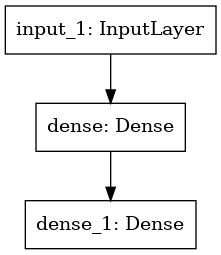

In [20]:
model.summary()
tf.keras.utils.plot_model(model)

In [21]:
batch_size = 32 
epochs = 400


In [22]:
model.compile(loss = 'sparse_categorical_crossentropy', 
              optimizer = 'adam',
              metrics = ['accuracy'])

In [23]:
history = model.fit(X_train , y_train , batch_size = batch_size , epochs = epochs , validation_split = 0.2)

2022-06-30 12:08:16.312635: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:185] None of the MLIR Optimization Passes are enabled (registered 2)


Epoch 1/400
3/3 [==============================] - 1s 129ms/step - loss: 1.1777 - accuracy: 0.0238 - val_loss: 1.1155 - val_accuracy: 0.0000e+00
Epoch 2/400
3/3 [==============================] - 0s 20ms/step - loss: 1.1486 - accuracy: 0.0357 - val_loss: 1.0850 - val_accuracy: 0.0476
Epoch 3/400
3/3 [==============================] - 0s 23ms/step - loss: 1.1215 - accuracy: 0.0833 - val_loss: 1.0556 - val_accuracy: 0.0952
Epoch 4/400
3/3 [==============================] - 0s 23ms/step - loss: 1.0949 - accuracy: 0.1071 - val_loss: 1.0273 - val_accuracy: 0.1905
Epoch 5/400
3/3 [==============================] - 0s 23ms/step - loss: 1.0670 - accuracy: 0.1310 - val_loss: 1.0005 - val_accuracy: 0.2857
Epoch 6/400
3/3 [==============================] - 0s 21ms/step - loss: 1.0423 - accuracy: 0.2024 - val_loss: 0.9743 - val_accuracy: 0.3333
Epoch 7/400
3/3 [==============================] - 0s 21ms/step - loss: 1.0185 - accuracy: 0.2738 - val_loss: 0.9492 - val_accuracy: 0.4286
Epoch 8/400
3/3

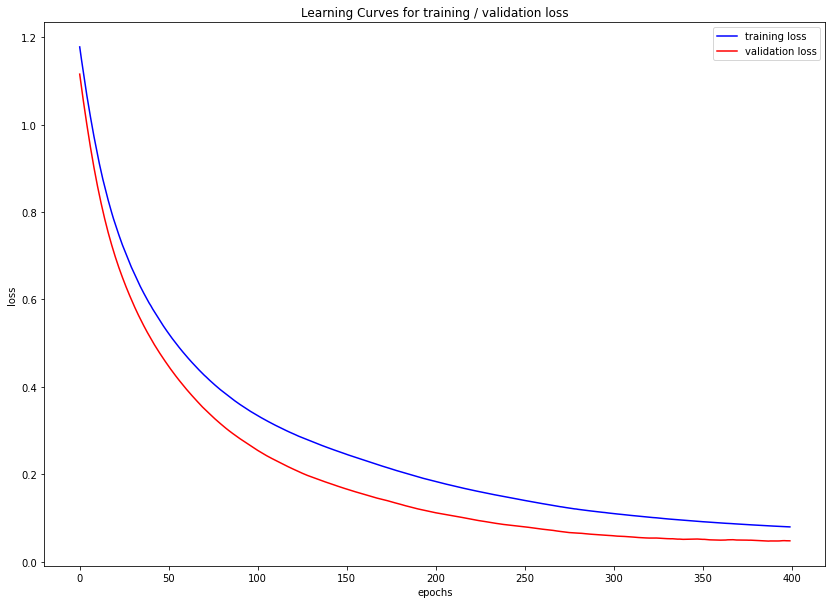

In [24]:
plt.figure(figsize = (14,10))
plt.plot(range(epochs) , history.history['loss'] , color = 'b')
plt.plot(range(epochs) , history.history['val_loss'] , color = 'r')
plt.title('Learning Curves for training / validation loss')
plt.xlabel('epochs')
plt.ylabel('loss')
plt.legend(['training loss' , 'validation loss'])
plt.show()

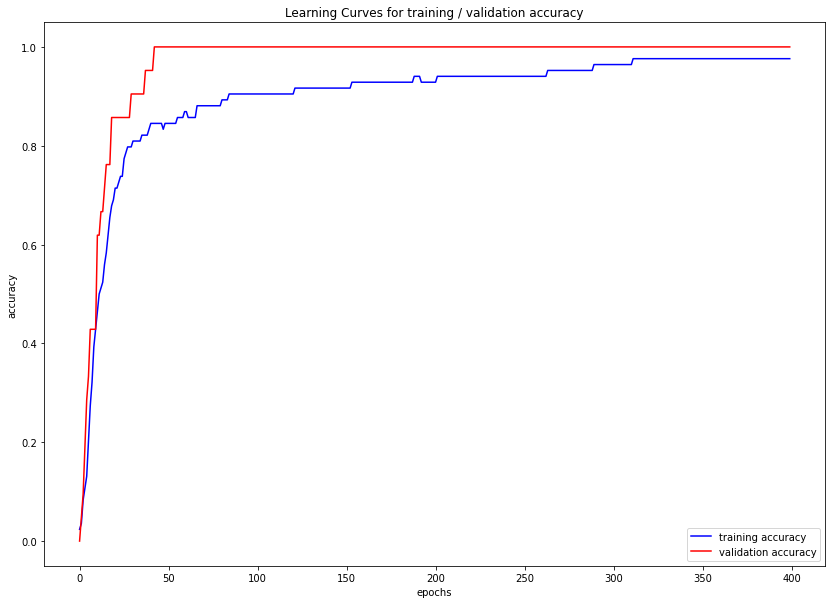

In [25]:
plt.figure(figsize = (14,10))
plt.plot(range(epochs) , history.history['accuracy'] , color = 'b')
plt.plot(range(epochs) , history.history['val_accuracy'] , color = 'r')
plt.title('Learning Curves for training / validation accuracy')
plt.xlabel('epochs')
plt.ylabel('accuracy')
plt.legend(['training accuracy' , 'validation accuracy'])
plt.show()

In [26]:
model.evaluate(X_test , y_test)

2/2 [==============================] - 0s 7ms/step - loss: 0.0866 - accuracy: 0.9778


[0.0866035670042038, 0.9777777791023254]